# 0. 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. 데이터 전처리

##### 사용할 함수정의

In [2]:
# 결측값을 높은 빈도 값으로 채우는 함수
def frequency_apply(df, criteria_col, target_col, n=0):
    if df[criteria_col].isnull().sum() > 0:
        print("Impossible if there are None : ",criteria_col)
        return
    
    if df[target_col].isnull().sum() > 0:
        print("Impossible if there are None : ",target_col)
        return
    
    target_index = df.loc[df[target_col] == 0][target_col].groupby(df[criteria_col]).count().index
    
    for i in range(0,len(target_index)):
        arr_value = df.loc[df[criteria_col] == target_index[i]][criteria_col].groupby(df[target_col]).count()
        max_value = df.loc[df[criteria_col] == target_index[i]][criteria_col].groupby(df[target_col]).count().max()
        
        for j in range(0,len(arr_value)):
            if max_value == arr_value.values[j]:
                k = j
                break
                
        change = df.loc[df[criteria_col] == target_index[i]][criteria_col].groupby(df[target_col]).count().index[k]        
        df.loc[(df[target_col] == n) & (df[criteria_col] == target_index[i]),target_col] = change
        
# 특정 컬럼의 널값 퍼센테이지를 확인하는 함수        
def None_percentage(df, col):
    per = df[col].isnull().sum() / df.shape[0]
    return print(col,"의 None값 ",round(per,4) * 100,"%")        

def col_diff(df1, df2):
    col = []
    for i in range(0,len(df1.columns)):
        for j in range(0,len(df2.columns)):
            if df1.columns[i] == df2.columns[j]:
                col.append(df1.columns[i])
    print("join columns : ",col)            
    return col


def str_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) == 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col


def int_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) != 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col 

def unique_check(df):
    
    for i in range(0,len(df.columns)):
        if df[df.columns[i]].isnull().sum() > 0:
            print("Impossible if there are None : ",df.columns[i])
        
    col_1 = []
    col_2 = []
    for i in range(0,len(df.columns)):
        if type(df[df.columns[i]][0]) == str:
            col_1.append(df.columns[i])
            
            if df[df.columns[i]].nunique() > 5:
                col_2.append(df.columns[i])
                print(df.columns[i],"컬럼의 unique 개수는 ",df[df.columns[i]].nunique(),"개")
                
    return col_1, col_2    

def p_100(a, b):
    print( round( (a/(a+b))*100,2), "%" )
    
def prepare_col(df, base_col, target_col):
    mean_df = df.groupby([base_col])[target_col].mean().to_frame()
    target_index = mean_df.index
    prepare_df = pd.concat([ (df.loc[df[base_col] == target_index[0]][target_col] - mean_df[target_col][target_index[0]]).to_frame(),\
                           (df.loc[df[base_col] == target_index[1]][target_col] - mean_df[target_col][target_index[1]]).to_frame(),\
                           (df.loc[df[base_col] == target_index[2]][target_col] - mean_df[target_col][target_index[2]]).to_frame(),\
                           (df.loc[df[base_col] == target_index[3]][target_col] - mean_df[target_col][target_index[3]]).to_frame(),\
                           (df.loc[df[base_col] == target_index[4]][target_col] - mean_df[target_col][target_index[4]]).to_frame(),\
                           (df.loc[df[base_col] == target_index[5]][target_col] - mean_df[target_col][target_index[5]]).to_frame(),\
                           (df.loc[df[base_col] == target_index[6]][target_col] - mean_df[target_col][target_index[6]]).to_frame()], axis=0)
    
    return prepare_df    

# 1 - 1  고객 특성 데이터 전처리 

In [3]:
CUST = pd.read_csv('./dataset/real_insurance_data/BGCON_CUST_DATA_2.csv',delimiter = None,encoding='utf-8')
print(CUST.shape)
print(CUST.dtypes)
print(CUST.isnull().sum())
CUST.tail(5)

(22400, 25)
CUST_ID               int64
DIVIDED_SET           int64
SIU_CUST_YN          object
SEX                   int64
AGE                   int64
RESI_COST             int64
RESI_TYPE_CODE      float64
FP_CAREER            object
CUST_RGST           float64
CTPR                 object
OCCP_GRP_1           object
OCCP_GRP_2           object
TOTALPREM           float64
MINCRDT             float64
MAXCRDT             float64
WEDD_YN              object
MATE_OCCP_GRP_1      object
MATE_OCCP_GRP_2      object
CHLD_CNT            float64
LTBN_CHLD_AGE       float64
MAX_PAYM_YM         float64
MAX_PRM             float64
CUST_INCM           float64
RCBASE_HSHD_INCM      int64
JPBASE_HSHD_INCM    float64
dtype: object
CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN          1793
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE       1254
FP_CAREER               0
CUST_RGST             456
CTPR                  621
OCCP_GRP_1    

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,...,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
22395,20048,2,NaN,1,34,5652,11.0,N,201103.0,경북,...,N,NaN,NaN,0.0,0.0,NaN,NaN,3331.0,3622,3331.0
22396,21483,1,N,2,30,31944,20.0,N,200306.0,경기,...,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,9361,8947.0
22397,21940,1,N,2,23,45972,20.0,N,200501.0,경기,...,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,11522,11484.0
22398,20356,1,N,1,15,27777,20.0,N,200306.0,경기,...,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7960,7614.0
22399,17118,1,N,2,18,21527,20.0,N,200306.0,경기,...,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7746,7746.0


##### DIVIDED_SET컬럼의 2번 데이터는 경진대회 문제지 (제외) : SIU_CUST_YN(정답지)컬럼의 null값도 사라짐

In [4]:
None_percentage(CUST, 'SIU_CUST_YN')
CUST_NY = CUST.loc[CUST['DIVIDED_SET'] == 1]

SIU_CUST_YN 의 None값  8.0 %


##### CTPR(시도구분)컬럼의 null값은 가장 많은 지역인 경기도로 변경

In [5]:
None_percentage(CUST_NY, 'CTPR')
CUST_NY.loc[CUST_NY['CTPR'].isnull(),'CTPR'] = '경기'

CTPR 의 None값  2.79 %


##### RESI_TYPE_CODE(거주TYPE)컬럼의 null값은 시도구분 컬럼 기준으로 많은 type의 건물로 맵핑

In [6]:
None_percentage(CUST_NY, 'RESI_TYPE_CODE')

CUST_NY['RESI_TYPE_CODE'] = CUST_NY['RESI_TYPE_CODE'].fillna(0, axis=0)

frequency_apply(CUST_NY, 'CTPR', 'RESI_TYPE_CODE')

CUST_NY = CUST_NY.astype({'RESI_TYPE_CODE': str})

RESI_TYPE_CODE 의 None값  5.56 %


##### RESI_COST(주택가격)컬럼의 null값은 거주TYPE기준으로 groupby진행해서 평균값으로 변경
##### 거주TYPE이 '숙박업소의 객실 또는 판자집'으로 되어있는 경우 0원으로 변경

In [7]:
print(CUST_NY['RESI_COST'].describe())

None_percentage(CUST_NY, 'RESI_COST')

CTPR_index = CUST_NY['CUST_ID'].groupby(CUST_NY['CTPR']).count().index

# RESI_COST컬럼의 결측값을 채워줌
for i in range(0,len(CTPR_index)):
    list_1 = CUST_NY.loc[(CUST_NY['CTPR'] == CTPR_index[i]) & (CUST_NY['RESI_COST']!=0)]['RESI_COST'].groupby(CUST_NY['RESI_TYPE_CODE']).median()
    
    for j in range(0,len(list_1)):
        # CUST_NY.loc[(CUST_NY['CTPR'] == CTPR_index[i]) & (CUST_NY['RESI_COST'] == 0),'RESI_COST'] = list_1.index[np.argmax(list_1)]
        if len(CUST_NY.loc[(CUST_NY['CTPR'] == CTPR_index[i]) & (CUST_NY['RESI_COST']==0) & (CUST_NY['RESI_TYPE_CODE'] == list_1.index[j])]) > 0:
            CUST_NY.loc[(CUST_NY['CTPR'] == CTPR_index[i]) & (CUST_NY['RESI_COST']==0) & (CUST_NY['RESI_TYPE_CODE'] == list_1.index[j]),'RESI_COST'] = list_1.values[j]    

count     20607.000000
mean      15944.537293
std       14897.582633
min           0.000000
25%        6748.000000
50%       12222.000000
75%       21111.000000
max      249503.000000
Name: RESI_COST, dtype: float64
RESI_COST 의 None값  0.0 %


In [8]:
CUST_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20607 entries, 0 to 22399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           20607 non-null  int64  
 1   DIVIDED_SET       20607 non-null  int64  
 2   SIU_CUST_YN       20607 non-null  object 
 3   SEX               20607 non-null  int64  
 4   AGE               20607 non-null  int64  
 5   RESI_COST         20607 non-null  float64
 6   RESI_TYPE_CODE    20607 non-null  object 
 7   FP_CAREER         20607 non-null  object 
 8   CUST_RGST         20188 non-null  float64
 9   CTPR              20607 non-null  object 
 10  OCCP_GRP_1        20060 non-null  object 
 11  OCCP_GRP_2        20060 non-null  object 
 12  TOTALPREM         15286 non-null  float64
 13  MINCRDT           11841 non-null  float64
 14  MAXCRDT           11841 non-null  float64
 15  WEDD_YN           20173 non-null  object 
 16  MATE_OCCP_GRP_1   9722 non-null   object

##### CUST_RGST(고객등록년월)컬럼은 2016년 8월을 기준으로 얼마나 가입했는지 나타내도록 변경함. null값은 평균 가입일수로 변경

In [9]:
print(CUST_NY['CUST_RGST'].describe())
CUST_NY['CUST_RGST_year'] = pd.to_datetime(CUST_NY['CUST_RGST']).dt.year
None_percentage(CUST_NY, 'CUST_RGST')

# CUST_NY['CUST_RGST_year'] = CUST_NY['CUST_RGST'].dt.year

CUST_NY.loc[CUST_NY['CUST_RGST'].notnull()]['CUST_ID'].groupby(CUST_NY['CUST_RGST']).count().index > 99999

CUST_NY.loc[CUST_NY['CUST_RGST']==101,'CUST_RGST'] = 0
CUST_NY['CUST_RGST'] = CUST_NY['CUST_RGST'].fillna(0,axis=0)

CUST_NY = CUST_NY.astype({'CUST_RGST': int})

CUST_NY = CUST_NY.astype({'CUST_RGST': str})


CUST_NY.loc[CUST_NY['CUST_RGST'] != '0','CUST_RGST'] = (dt.datetime(2016, 8, 1) - pd.to_datetime(CUST_NY.loc[CUST_NY['CUST_RGST'] != '0']['CUST_RGST'],format='%Y%m')).dt.days

sum_value = 0
temp = len(CUST_NY.loc[CUST_NY['CUST_RGST'] != '0']['CUST_ID'].groupby(CUST_NY['CUST_RGST']).count().index)

for i in range(0,temp):
    sum_value = sum_value + CUST_NY.loc[CUST_NY['CUST_RGST'] != '0']['CUST_ID'].groupby(CUST_NY['CUST_RGST']).count().index[i]
mean_value = sum_value / temp  

CUST_NY.loc[CUST_NY['CUST_RGST'] == '0','CUST_RGST'] = int(mean_value)
CUST_NY = CUST_NY.astype({'CUST_RGST':float})

count     20188.000000
mean     198907.676392
std       17088.418731
min         101.000000
25%      200306.000000
50%      200306.000000
75%      200401.000000
max      201602.000000
Name: CUST_RGST, dtype: float64
CUST_RGST 의 None값  2.03 %


##### OCCP_GRP_1(직업분류코드1)과 OCCP_GRP_2(직업분류코드2)컬럼의 null값은 groupby를 통해 빈도수가 많은 직업분류로 맵핑

In [10]:
None_percentage(CUST_NY, 'OCCP_GRP_1')
None_percentage(CUST_NY, 'OCCP_GRP_2')

num = np.argmax(CUST_NY.loc[CUST_NY['OCCP_GRP_1'].notnull()]['CUST_ID'].groupby(CUST_NY['OCCP_GRP_1']).count())
target = CUST_NY.loc[CUST_NY['OCCP_GRP_1'].notnull()]['CUST_ID'].groupby(CUST_NY['OCCP_GRP_1']).count().index[num]
CUST_NY.loc[CUST_NY['OCCP_GRP_1'].isnull(),'OCCP_GRP_1'] = target

num = np.argmax(CUST_NY.loc[(CUST_NY['OCCP_GRP_2'].notnull()) & (CUST_NY['OCCP_GRP_1'] == target)]['CUST_ID'].groupby(CUST_NY['OCCP_GRP_2']).count())
target = CUST_NY.loc[(CUST_NY['OCCP_GRP_2'].notnull()) & (CUST_NY['OCCP_GRP_1'] == target)]['CUST_ID'].groupby(CUST_NY['OCCP_GRP_2']).count().index[num]
CUST_NY.loc[CUST_NY['OCCP_GRP_2'].isnull(),'OCCP_GRP_2'] = target

OCCP_GRP_1 의 None값  2.65 %
OCCP_GRP_2 의 None값  2.65 %


##### TOTALPREM(납입총보험료)컬럼의 null값은 groupby를 통해 직업군별 중앙값으로 적용

In [11]:
print(CUST_NY['TOTALPREM'].describe())

None_percentage(CUST_NY, 'TOTALPREM')
arr_1 = CUST_NY.loc[CUST_NY['TOTALPREM'].notnull()]['TOTALPREM'].groupby(CUST_NY['OCCP_GRP_1']).median().index
arr_2 = CUST_NY.loc[CUST_NY['TOTALPREM'].notnull()]['TOTALPREM'].groupby(CUST_NY['OCCP_GRP_1']).median().values

for i in range(0,len(arr_1)):
    CUST_NY.loc[(CUST_NY['TOTALPREM'].isnull()) & (CUST_NY['OCCP_GRP_1'] == arr_1[i]), 'TOTALPREM'] = arr_2[i]

count    1.528600e+04
mean     3.010216e+07
std      4.945351e+07
min      5.000000e+02
25%      6.681712e+06
50%      1.618889e+07
75%      3.479242e+07
max      1.840052e+09
Name: TOTALPREM, dtype: float64
TOTALPREM 의 None값  25.82 %


##### WEDD_YN(결혼여부)컬럼의 null값은 N으로 변경

In [12]:
None_percentage(CUST_NY, 'WEDD_YN')
CUST_NY.loc[CUST_NY['WEDD_YN'].isnull(),'WEDD_YN'] = 'N'

WEDD_YN 의 None값  2.11 %


##### MATE_OCCP_GRP_1(배우자직업그룹코드1)과 MATE_OCCP_GRP_2(배우자직업그룹코드2)는 null값의 비중이 크고 null값에 대한 별도의 기준이 없으므로 삭제

In [13]:
None_percentage(CUST_NY, 'MATE_OCCP_GRP_1')
None_percentage(CUST_NY, 'MATE_OCCP_GRP_2')
CUST_NY.drop(['MATE_OCCP_GRP_1','MATE_OCCP_GRP_2'], axis=1, inplace=True)

MATE_OCCP_GRP_1 의 None값  52.82 %
MATE_OCCP_GRP_2 의 None값  52.82 %


##### CHLD_CNT(자녀수)와 LTBN_CHLD_AGE(막내자녀연령)의 null값은 WEDD_YN(결혼여부)컬럼 null값과 행이 동일하므로 모두 0으로 맵핑

In [14]:
None_percentage(CUST_NY, 'CHLD_CNT')
None_percentage(CUST_NY, 'LTBN_CHLD_AGE')

CUST_NY.loc[CUST_NY['CHLD_CNT'].isnull(),'CHLD_CNT'] = 0
CUST_NY.loc[CUST_NY['LTBN_CHLD_AGE'].isnull(),'LTBN_CHLD_AGE'] = 0

CHLD_CNT 의 None값  2.11 %
LTBN_CHLD_AGE 의 None값  2.11 %


##### CUST_INCM(고객추정소득)컬럼의 null값의 각 직업군의 대분류와 소분류를 합친 기준으로 중앙값으로 대체

In [15]:
None_percentage(CUST_NY, 'CUST_INCM')

kinds = CUST_NY.loc[CUST_NY['CUST_INCM'].notnull()].groupby(['OCCP_GRP_1','OCCP_GRP_2'])['CUST_INCM'].median().index
df_target = CUST_NY.loc[CUST_NY['CUST_INCM'].isnull()]
len_1 = len(df_target.index)
len_2 = len(kinds)

for i in range(0,len_1):
    for j in range(0,len_2):
        if df_target['OCCP_GRP_1'].values[i] == kinds[j][0]:
            for k in range(0,len(kinds[j])):
                if df_target['OCCP_GRP_2'].values[i] == kinds[j][k]:
                    discovery = CUST_NY.loc[ (CUST_NY['CUST_INCM'].notnull()) & (CUST_NY['OCCP_GRP_1'] == kinds[j][0])\
                                            & (CUST_NY['OCCP_GRP_2'] == kinds[j][k])]['CUST_INCM'].median()
                    
                    CUST_NY.loc[ (CUST_NY['CUST_INCM'].isnull()) & (CUST_NY['OCCP_GRP_1'] == kinds[j][0])\
                                            & (CUST_NY['OCCP_GRP_2'] == kinds[j][k]),'CUST_INCM'] = discovery 

CUST_INCM 의 None값  23.400000000000002 %


In [16]:
CUST_NY = CUST_NY.loc[CUST_NY['CUST_INCM'].notnull()]                    

##### MAX_PAYM_YM(최대보험료연월), MAX_PRM(최대보험료)컬럼들은 중요해 보이지만 null값의 비중이 크고 null값에 대한 별도의 기준이 없으므로 삭제

In [17]:
None_percentage(CUST_NY, 'MAX_PAYM_YM')
None_percentage(CUST_NY, 'MAX_PRM')

CUST_NY.drop(['MAX_PAYM_YM','MAX_PRM'], axis=1, inplace=True)

MAX_PAYM_YM 의 None값  28.95 %
MAX_PRM 의 None값  28.95 %


##### MAXCRDT(최고신용등급)과 MINCRDT(최저신용등급)컬럼의 null값은 6등급으로 맵핑

In [18]:
None_percentage(CUST_NY, 'MINCRDT')
None_percentage(CUST_NY, 'MAXCRDT')
CUST_NY.loc[CUST_NY['MINCRDT'].isnull(),'MINCRDT'] = 6.0
CUST_NY.loc[CUST_NY['MAXCRDT'].isnull(),'MAXCRDT'] = 6.0

CUST_NY.loc[CUST_NY['MINCRDT'] < 1,'MINCRDT'] = 1
CUST_NY.loc[CUST_NY['MAXCRDT'] < 1,'MAXCRDT'] = 1

CUST_NY.loc[CUST_NY['MINCRDT'] > 10,'MINCRDT'] = 6
CUST_NY.loc[CUST_NY['MAXCRDT'] > 10,'MAXCRDT'] = 6

MINCRDT 의 None값  42.54 %
MAXCRDT 의 None값  42.54 %


##### JPBASE_HSHD_INCM(추정가구소득2)컬럼의 null값은 직업분류컬럼을 groupby해서 평균소득으로 변경함

In [19]:
print(CUST_NY['JPBASE_HSHD_INCM'].describe())

None_percentage(CUST_NY, 'JPBASE_HSHD_INCM')

arr_1 = CUST_NY.loc[CUST_NY['JPBASE_HSHD_INCM'].notnull()]['JPBASE_HSHD_INCM'].groupby(CUST_NY['OCCP_GRP_1']).median().index
arr_2 = CUST_NY.loc[CUST_NY['JPBASE_HSHD_INCM'].notnull()]['JPBASE_HSHD_INCM'].groupby(CUST_NY['OCCP_GRP_1']).median().values

for i in range(0,len(arr_1)):
    CUST_NY.loc[(CUST_NY['JPBASE_HSHD_INCM'].isnull()) & (CUST_NY['OCCP_GRP_1'] == arr_1[i]), 'JPBASE_HSHD_INCM'] = arr_2[i]

count    19990.000000
mean      5204.012856
std       2716.401113
min          0.000000
25%       3558.000000
50%       4686.500000
75%       6848.500000
max      25872.000000
Name: JPBASE_HSHD_INCM, dtype: float64
JPBASE_HSHD_INCM 의 None값  2.9899999999999998 %


In [20]:
CUST_NY.drop(['DIVIDED_SET'], axis=1,inplace=True)

##### null값 확인

In [21]:
CUST_NY.isnull().sum()

CUST_ID               0
SIU_CUST_YN           0
SEX                   0
AGE                   0
RESI_COST             0
RESI_TYPE_CODE        0
FP_CAREER             0
CUST_RGST             0
CTPR                  0
OCCP_GRP_1            0
OCCP_GRP_2            0
TOTALPREM             0
MINCRDT               0
MAXCRDT               0
WEDD_YN               0
CHLD_CNT              0
LTBN_CHLD_AGE         0
CUST_INCM             0
RCBASE_HSHD_INCM      0
JPBASE_HSHD_INCM      0
CUST_RGST_year      419
dtype: int64

In [22]:
CUST_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20606 entries, 0 to 22399
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           20606 non-null  int64  
 1   SIU_CUST_YN       20606 non-null  object 
 2   SEX               20606 non-null  int64  
 3   AGE               20606 non-null  int64  
 4   RESI_COST         20606 non-null  float64
 5   RESI_TYPE_CODE    20606 non-null  object 
 6   FP_CAREER         20606 non-null  object 
 7   CUST_RGST         20606 non-null  float64
 8   CTPR              20606 non-null  object 
 9   OCCP_GRP_1        20606 non-null  object 
 10  OCCP_GRP_2        20606 non-null  object 
 11  TOTALPREM         20606 non-null  float64
 12  MINCRDT           20606 non-null  float64
 13  MAXCRDT           20606 non-null  float64
 14  WEDD_YN           20606 non-null  object 
 15  CHLD_CNT          20606 non-null  float64
 16  LTBN_CHLD_AGE     20606 non-null  float6

##### 범주형 데이터인데 숫자형으로 되어있을 경우 변경해줌

In [23]:
CUST_NY = CUST_NY.astype({'SEX':str
                         ,'MINCRDT':str
                         ,'MAXCRDT':str})          

# 1 - 2 보험 청구 데이터 전처리

In [24]:
CLAIM = pd.read_csv('./dataset/real_insurance_data/BGCON_CLAIM_DATA_2.csv',delimiter = None,encoding='utf-8')

print(CLAIM.shape)
print(CLAIM.info(memory_usage='deep'))
print(CLAIM.isnull().sum())
CLAIM.tail(5)

(119020, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119020 entries, 0 to 119019
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CUST_ID          119020 non-null  int64  
 1   POLY_NO          119020 non-null  int64  
 2   ACCI_OCCP_GRP1   117603 non-null  object 
 3   ACCI_OCCP_GRP2   117603 non-null  object 
 4   CHANG_FP_YN      119020 non-null  object 
 5   CNTT_RECP_SQNO   119020 non-null  float64
 6   RECP_DATE        119020 non-null  int64  
 7   ORIG_RESN_DATE   119020 non-null  int64  
 8   RESN_DATE        119020 non-null  int64  
 9   CRNT_PROG_DVSN   119020 non-null  int64  
 10  ACCI_DVSN        119020 non-null  int64  
 11  CAUS_CODE        119020 non-null  object 
 12  CAUS_CODE_DTAL   119020 non-null  object 
 13  DSAS_NAME        119020 non-null  object 
 14  DMND_RESN_CODE   119020 non-null  int64  
 15  DMND_RSCD_SQNO   119020 non-null  int64  
 16  HOSP_OTPA_STDT   86449 no

,CUST_ID,POLY_NO,ACCI_OCCP_GRP1,ACCI_OCCP_GRP2,CHANG_FP_YN,CNTT_RECP_SQNO,RECP_DATE,ORIG_RESN_DATE,RESN_DATE,CRNT_PROG_DVSN,...,PMMI_DLNG_YN,SELF_CHAM,NON_PAY,TAMT_SFCA,PATT_CHRG_TOTA,DSCT_AMT,COUNT_TRMT_ITEM,DCAF_CMPS_XCPA,NON_PAY_RATIO,HEED_HOSP_YN
119015,15545,48830,3.사무직,사무직,Y,2.215030e+12,20150303,20140919,20150123,23,...,Y,103350.0,227700.0,0.0,331050.0,0.0,1.0,NaN,1,N
119016,15489,110348,NaN,NaN,Y,2.215050e+12,20150513,20150427,20150427,23,...,Y,28521.0,23000.0,0.0,51521.0,21.0,1.0,22000.0,0,N
119017,6864,110453,NaN,NaN,Y,2.215060e+12,20150618,20150604,20150604,23,...,Y,139854.0,1616000.0,0.0,1755854.0,54.0,1.0,10000.0,1,N
119018,15545,48830,3.사무직,사무직,Y,2.215060e+12,20150618,20140919,20150523,23,...,Y,39100.0,93000.0,0.0,132100.0,0.0,1.0,43000.0,1,N
119019,21542,34676,8.기타,학생,N,2.215060e+12,20150630,20150506,20150506,23,...,Y,44003.0,1054241.0,0.0,1098244.0,4.0,1.0,3000.0,1,N


##### ACCI_OCCP_GRP1(직업그룹코드1)와 ACCI_OCCP_GRP2(직업그룹코드2)컬럼의 null값은 해당컬럼을 groupby하여 가장 많은 빈도수를 가지는 그룹코드로 맵핑 

In [25]:
None_percentage(CLAIM,'ACCI_OCCP_GRP1')
None_percentage(CLAIM,'ACCI_OCCP_GRP2')

num = np.argmax(CLAIM.loc[CLAIM['ACCI_OCCP_GRP1'].notnull()]['CUST_ID'].groupby(CLAIM['ACCI_OCCP_GRP1']).count())
target = CLAIM.loc[CLAIM['ACCI_OCCP_GRP1'].notnull()]['CUST_ID'].groupby(CLAIM['ACCI_OCCP_GRP1']).count().index[num]
CLAIM.loc[CLAIM['ACCI_OCCP_GRP1'].isnull(),'ACCI_OCCP_GRP1'] = target


num = np.argmax(CLAIM.loc[CLAIM['ACCI_OCCP_GRP2'].notnull()]['CUST_ID'].groupby(CLAIM['ACCI_OCCP_GRP2']).count())
target = CLAIM.loc[CLAIM['ACCI_OCCP_GRP2'].notnull()]['CUST_ID'].groupby(CLAIM['ACCI_OCCP_GRP2']).count().index[num]
CLAIM.loc[CLAIM['ACCI_OCCP_GRP2'].isnull(),'ACCI_OCCP_GRP2'] = target

ACCI_OCCP_GRP1 의 None값  1.1900000000000002 %
ACCI_OCCP_GRP2 의 None값  1.1900000000000002 %


##### RECP_DATE(사고접수일자), ORIG_RESN_DATE(원사유일자), RESN_DATE(사유일자)컬럼의 data type을 float에서 datetime으로 변경

In [26]:
CLAIM['RECP_DATE'] = pd.to_datetime(CLAIM['RECP_DATE'],format='%Y%m%d')

CLAIM['ORIG_RESN_DATE'] = pd.to_datetime(CLAIM['ORIG_RESN_DATE'],format='%Y%m%d')

CLAIM['RESN_DATE'] = pd.to_datetime(CLAIM['RESN_DATE'],format='%Y%m%d')

##### HOSP_OTPA_STDT(입원/통원시작일자)와 HOSP_OTPA_ENDT(입원/통원종료일자)컬럼은 중요한 컬럼으로 보이지만 null값의 비중이 크고 null값에 대한 별도의 기준이 없으므로 삭제 

In [27]:
None_percentage(CLAIM,'HOSP_OTPA_STDT')
None_percentage(CLAIM,'HOSP_OTPA_ENDT')

CLAIM.drop(['HOSP_OTPA_STDT','HOSP_OTPA_ENDT'], axis=1, inplace=True)

HOSP_OTPA_STDT 의 None값  27.37 %
HOSP_OTPA_ENDT 의 None값  27.37 %


##### HOUSE_HOSP_DIST(고객병원거리)컬럼의 null값은 중앙값으로 변경

In [28]:
print(CLAIM['HOUSE_HOSP_DIST'].describe())

None_percentage(CLAIM,'HOUSE_HOSP_DIST')

CLAIM.loc[CLAIM['HOUSE_HOSP_DIST'].isnull(),'HOUSE_HOSP_DIST'] = CLAIM.loc[CLAIM['HOUSE_HOSP_DIST'].notnull()]['HOUSE_HOSP_DIST'].median()

count    101972.000000
mean         24.920284
std          58.942734
min           0.000000
25%           1.620000
50%           4.540000
75%          15.330000
max         528.620000
Name: HOUSE_HOSP_DIST, dtype: float64
HOUSE_HOSP_DIST 의 None값  14.32 %


##### HOSP_CODE(병원코드)컬럼의 null값은 병원지역도 null값이므로 특정할수 없어 삭제

In [29]:
None_percentage(CLAIM,'HOSP_CODE')

CLAIM = CLAIM.loc[CLAIM['HOSP_CODE'].notnull()]

HOSP_CODE 의 None값  0.01 %


##### ACCI_HOSP_ADDR(병원지역(시도))컬럼의 null값은 '모름'으로 변경

In [30]:
None_percentage(CLAIM,'ACCI_HOSP_ADDR')

CLAIM.loc[CLAIM['ACCI_HOSP_ADDR'].isnull(),'ACCI_HOSP_ADDR'] = '모름'

ACCI_HOSP_ADDR 의 None값  8.450000000000001 %


##### PAYM_DATE(보험금 지급일자)컬럼의 null값은 삭제 & date type을 float에서 datetime으로 변경

In [31]:
None_percentage(CLAIM,'PAYM_DATE')

CLAIM = CLAIM.loc[CLAIM['PAYM_DATE'].notnull()]

CLAIM['PAYM_DATE'] = pd.to_datetime(CLAIM['PAYM_DATE'],format='%Y%m%d')

PAYM_DATE 의 None값  0.01 %


##### null값이 많은 컬럼 삭제(급여, 비급여, 잔료과목개수 등의 데이터)

In [32]:
None_percentage(CLAIM,'SELF_CHAM')
None_percentage(CLAIM,'NON_PAY')
None_percentage(CLAIM,'TAMT_SFCA')
None_percentage(CLAIM,'PATT_CHRG_TOTA')
None_percentage(CLAIM,'DSCT_AMT')
None_percentage(CLAIM,'COUNT_TRMT_ITEM')
None_percentage(CLAIM,'DCAF_CMPS_XCPA')

CLAIM.drop(['SELF_CHAM','NON_PAY','TAMT_SFCA','PATT_CHRG_TOTA','DSCT_AMT','COUNT_TRMT_ITEM','DCAF_CMPS_XCPA'], axis=1, inplace=True)

SELF_CHAM 의 None값  84.07 %
NON_PAY 의 None값  84.07 %
TAMT_SFCA 의 None값  84.07 %
PATT_CHRG_TOTA 의 None값  84.07 %
DSCT_AMT 의 None값  84.07 %
COUNT_TRMT_ITEM 의 None값  84.07 %
DCAF_CMPS_XCPA 의 None값  93.24 %


In [33]:
CLAIM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118998 entries, 0 to 119019
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CUST_ID          118998 non-null  int64         
 1   POLY_NO          118998 non-null  int64         
 2   ACCI_OCCP_GRP1   118998 non-null  object        
 3   ACCI_OCCP_GRP2   118998 non-null  object        
 4   CHANG_FP_YN      118998 non-null  object        
 5   CNTT_RECP_SQNO   118998 non-null  float64       
 6   RECP_DATE        118998 non-null  datetime64[ns]
 7   ORIG_RESN_DATE   118998 non-null  datetime64[ns]
 8   RESN_DATE        118998 non-null  datetime64[ns]
 9   CRNT_PROG_DVSN   118998 non-null  int64         
 10  ACCI_DVSN        118998 non-null  int64         
 11  CAUS_CODE        118998 non-null  object        
 12  CAUS_CODE_DTAL   118998 non-null  object        
 13  DSAS_NAME        118998 non-null  object        
 14  DMND_RESN_CODE   118

##### 범주형 데이터인데 숫자형으로 되어있을 경우 변경해줌

In [34]:
CLAIM = CLAIM.astype({'CRNT_PROG_DVSN':str
                     ,'ACCI_DVSN' : str
                     ,'DMND_RESN_CODE' : str
                      ,'DMND_RSCD_SQNO' : str
                     ,'HOSP_SPEC_DVSN':str
                     ,'HOSP_CODE' : str
                     ,'CHME_LICE_NO' : str})

In [35]:
CLAIM.isnull().sum()

CUST_ID            0
POLY_NO            0
ACCI_OCCP_GRP1     0
ACCI_OCCP_GRP2     0
CHANG_FP_YN        0
CNTT_RECP_SQNO     0
RECP_DATE          0
ORIG_RESN_DATE     0
RESN_DATE          0
CRNT_PROG_DVSN     0
ACCI_DVSN          0
CAUS_CODE          0
CAUS_CODE_DTAL     0
DSAS_NAME          0
DMND_RESN_CODE     0
DMND_RSCD_SQNO     0
RESL_CD1           0
RESL_NM1           0
VLID_HOSP_OTDA     0
HOUSE_HOSP_DIST    0
HOSP_CODE          0
ACCI_HOSP_ADDR     0
HOSP_SPEC_DVSN     0
CHME_LICE_NO       0
PAYM_DATE          0
DMND_AMT           0
PAYM_AMT           0
PMMI_DLNG_YN       0
NON_PAY_RATIO      0
HEED_HOSP_YN       0
dtype: int64

In [36]:
# target_cnt =  CUST.groupby(['CUST_ID'])['CUST_ID'].count().values

# for i in range(0,len(target_cnt)):
#     if CUST.groupby(['CUST_ID'])['CUST_ID'].count().values[i] > 1:
#         print("중복")

# 1 - 3계약 속성 데이터 전처리

In [37]:
CNTT = pd.read_csv('./dataset/real_insurance_data/BGCON_CNTT_DATA_2.csv',delimiter = None,encoding='utf-8')

print(CNTT.shape)
print(CNTT.dtypes)
print(CNTT.isnull().sum())
CNTT.tail(5)

(113010, 21)
POLY_NO             int64
CUST_ID             int64
CUST_ROLE           int64
IRKD_CODE_DTAL      int64
IRKD_CODE_ITEM      int64
GOOD_CLSF_CDNM     object
CNTT_YM             int64
CLLT_FP_PRNO      float64
REAL_PAYM_TERM      int64
SALE_CHNL_CODE      int64
CNTT_STAT_CODE     object
EXPR_YM           float64
EXTN_YM           float64
LAPS_YM           float64
PAYM_CYCL_CODE    float64
MAIN_INSR_AMT     float64
SUM_ORIG_PREM     float64
RECP_PUBL         float64
CNTT_RECP         float64
MNTH_INCM_AMT     float64
DISTANCE          float64
dtype: object
POLY_NO               0
CUST_ID               0
CUST_ROLE             0
IRKD_CODE_DTAL        0
IRKD_CODE_ITEM        0
GOOD_CLSF_CDNM        0
CNTT_YM               0
CLLT_FP_PRNO         82
REAL_PAYM_TERM        0
SALE_CHNL_CODE        0
CNTT_STAT_CODE       82
EXPR_YM              82
EXTN_YM           54217
LAPS_YM           91629
PAYM_CYCL_CODE       82
MAIN_INSR_AMT        82
SUM_ORIG_PREM        82
RECP_PUBL          

,POLY_NO,CUST_ID,CUST_ROLE,IRKD_CODE_DTAL,IRKD_CODE_ITEM,GOOD_CLSF_CDNM,CNTT_YM,CLLT_FP_PRNO,REAL_PAYM_TERM,SALE_CHNL_CODE,...,EXPR_YM,EXTN_YM,LAPS_YM,PAYM_CYCL_CODE,MAIN_INSR_AMT,SUM_ORIG_PREM,RECP_PUBL,CNTT_RECP,MNTH_INCM_AMT,DISTANCE
113005,112765,12297,1,1267,1,보장,200204,4033.0,10,2,...,201204.0,200205.0,NaN,1.0,10000000.0,33600.0,0.0,0.0,0.0,3.0
113006,112766,9296,1,1256,27,일반종신,200204,4023.0,20,2,...,999912.0,200602.0,200602.0,1.0,50000000.0,154250.0,0.0,0.0,0.0,8.0
113007,112767,20517,1,1267,1,보장,200204,4033.0,10,2,...,202204.0,NaN,NaN,1.0,10000000.0,90100.0,0.0,0.0,0.0,7.0
113008,112768,1316,1,1228,13,일반연금,200204,2309.0,10,2,...,999912.0,200812.0,200508.0,1.0,2461560.0,20513.0,0.0,0.0,0.0,NaN
113009,112769,20760,1,1259,19,보장,200204,2217.0,10,2,...,203104.0,NaN,NaN,1.0,10000000.0,52000.0,0.0,0.0,0.0,0.0


##### CLLT_FP_PRNO(FP사번)컬럼의 null값 삭제 : FP의 정보와 관련된 컬럼에서 null값이 함께 제거됨
##### CNTT_STAT_CODE(계약상태코드), EXPR_YM(만기년월), PAYM_CYCL_CODE(납입주기코드), MAIN_INSR_AMT(주보험금)             
##### SUM_ORIG_PREM(합계보험료), RECP_PUBL(청약서 접수소요일), CNTT_RECP(청약서 계약소요일), MNTH_INCM_AMT(청약서 소득)

In [38]:
None_percentage(CNTT,'CLLT_FP_PRNO')

CNTT = CNTT.loc[CNTT['CLLT_FP_PRNO'].notnull()]
CNTT = CNTT.loc[CNTT['RECP_PUBL'].notnull()]

CLLT_FP_PRNO 의 None값  0.06999999999999999 %


##### EXPR_YM(만기년월)컬럼의 999912는 datetime으로 변경이 어려워 임의의 날짜 210012로 변경
##### EXTN_YM(소멸년월)컬럼의 null값은 소멸한 적이 없는 보험이므로 임의의 날짜 210012로 맵핑
##### LAPS_YM(실효년월)컬럼의 null값은 실효된 적이 없는 보험이므로 임의의 날짜 210012로 맵핑

In [39]:
CNTT.loc[CNTT['EXPR_YM']==999912,'EXPR_YM']= 210012

CNTT.loc[CNTT['EXTN_YM'].isnull(),'EXTN_YM'] = 210012

CNTT.loc[CNTT['LAPS_YM'].isnull(),'LAPS_YM'] = 210012

CNTT['CNTT_YM'] = pd.to_datetime(CNTT['CNTT_YM'],format='%Y%m')
CNTT['EXPR_YM'] = pd.to_datetime(CNTT['EXPR_YM'],format='%Y%m')
CNTT['EXTN_YM'] = pd.to_datetime(CNTT['EXTN_YM'],format='%Y%m')
CNTT['LAPS_YM'] = pd.to_datetime(CNTT['LAPS_YM'],format='%Y%m')

##### DISTANCE(FP와 고객의거리)컬럼의 null값은 중앙값으로 대체

In [40]:
print(CNTT['DISTANCE'].describe())

None_percentage(CNTT,'DISTANCE')

CNTT.loc[CNTT['DISTANCE'].isnull(),'DISTANCE'] = CNTT.loc[CNTT['DISTANCE'].notnull()]['DISTANCE'].median()

count    102452.000000
mean         37.127728
std          75.855672
min           0.000000
25%           1.000000
50%           7.000000
75%          26.000000
max         747.000000
Name: DISTANCE, dtype: float64
DISTANCE 의 None값  9.28 %


In [41]:
CNTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112926 entries, 0 to 113009
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   POLY_NO         112926 non-null  int64         
 1   CUST_ID         112926 non-null  int64         
 2   CUST_ROLE       112926 non-null  int64         
 3   IRKD_CODE_DTAL  112926 non-null  int64         
 4   IRKD_CODE_ITEM  112926 non-null  int64         
 5   GOOD_CLSF_CDNM  112926 non-null  object        
 6   CNTT_YM         112926 non-null  datetime64[ns]
 7   CLLT_FP_PRNO    112926 non-null  float64       
 8   REAL_PAYM_TERM  112926 non-null  int64         
 9   SALE_CHNL_CODE  112926 non-null  int64         
 10  CNTT_STAT_CODE  112926 non-null  object        
 11  EXPR_YM         112926 non-null  datetime64[ns]
 12  EXTN_YM         112926 non-null  datetime64[ns]
 13  LAPS_YM         112926 non-null  datetime64[ns]
 14  PAYM_CYCL_CODE  112926 non-null  flo

##### 범주형 데이터인데 숫자형으로 되어있을 경우 변경해줌

In [42]:
CNTT = CNTT.astype({'CUST_ROLE' : str
                     ,'IRKD_CODE_DTAL' : str
                     ,'IRKD_CODE_ITEM' : str
                     ,'SALE_CHNL_CODE' : str
                     ,'PAYM_CYCL_CODE' : str})

In [43]:
CNTT.isnull().sum()

POLY_NO           0
CUST_ID           0
CUST_ROLE         0
IRKD_CODE_DTAL    0
IRKD_CODE_ITEM    0
GOOD_CLSF_CDNM    0
CNTT_YM           0
CLLT_FP_PRNO      0
REAL_PAYM_TERM    0
SALE_CHNL_CODE    0
CNTT_STAT_CODE    0
EXPR_YM           0
EXTN_YM           0
LAPS_YM           0
PAYM_CYCL_CODE    0
MAIN_INSR_AMT     0
SUM_ORIG_PREM     0
RECP_PUBL         0
CNTT_RECP         0
MNTH_INCM_AMT     0
DISTANCE          0
dtype: int64

# 1 - 4 설계사 정보 데이터 전처리

In [44]:
FPINFO = pd.read_csv('./dataset/real_insurance_data/BGCON_FPINFO_DATA_2.csv',delimiter = None,encoding='utf-8')

print(FPINFO.shape)
print(FPINFO.dtypes)
print(FPINFO.isnull().sum())
FPINFO.tail(5)

(31522, 7)
CLLT_FP_PRNO      int64
INCB_DVSN        object
ETRS_YM         float64
FIRE_YM         float64
BEFO_JOB         object
EDGB             object
BRCH_CODE       float64
dtype: object
CLLT_FP_PRNO      0
INCB_DVSN         2
ETRS_YM         257
FIRE_YM         256
BEFO_JOB        256
EDGB            256
BRCH_CODE         2
dtype: int64


,CLLT_FP_PRNO,INCB_DVSN,ETRS_YM,FIRE_YM,BEFO_JOB,EDGB,BRCH_CODE
31517,2282,D,NaN,NaN,NaN,NaN,99999999.0
31518,55,D,NaN,NaN,NaN,NaN,99999999.0
31519,118,D,NaN,NaN,NaN,NaN,99999999.0
31520,93,D,NaN,NaN,NaN,NaN,99999999.0
31521,80,D,NaN,NaN,NaN,NaN,99999999.0


##### INCB_DVSN(재직구분), ETRS_YM(위촉년월), FIRE_YM(해촉년월), BEFO_JOB(입사전직업), EDGB(학력)컬럼의 null값 제거

In [45]:
None_percentage(FPINFO,'INCB_DVSN')

FPINFO = FPINFO.loc[FPINFO['INCB_DVSN'].notnull()]

FPINFO = FPINFO.loc[FPINFO['ETRS_YM'].notnull()]

FPINFO.loc[FPINFO['FIRE_YM']==999912,'FIRE_YM']= 210012
FPINFO['ETRS_YM'] = pd.to_datetime(FPINFO['ETRS_YM'],format='%Y%m')
FPINFO['FIRE_YM'] = pd.to_datetime(FPINFO['FIRE_YM'],format='%Y%m')

INCB_DVSN 의 None값  0.01 %


In [46]:
FPINFO.isnull().sum()

CLLT_FP_PRNO    0
INCB_DVSN       0
ETRS_YM         0
FIRE_YM         0
BEFO_JOB        0
EDGB            0
BRCH_CODE       0
dtype: int64

In [47]:
FPINFO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31265 entries, 0 to 31489
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CLLT_FP_PRNO  31265 non-null  int64         
 1   INCB_DVSN     31265 non-null  object        
 2   ETRS_YM       31265 non-null  datetime64[ns]
 3   FIRE_YM       31265 non-null  datetime64[ns]
 4   BEFO_JOB      31265 non-null  object        
 5   EDGB          31265 non-null  object        
 6   BRCH_CODE     31265 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 1.9+ MB


##### 범주형 데이터인데 숫자형으로 되어있을 경우 변경해줌

In [48]:
FPINFO = FPINFO.astype({'BRCH_CODE' : str})

# 1 - 5 가족관계 데이터 전처리

##### null값 존재하지 않음

In [49]:
FMLY = pd.read_csv('./dataset/real_insurance_data/BGCON_FMLY_DATA_2.csv',delimiter = None,encoding='utf-8')

print(FMLY.shape)
print(FMLY.dtypes)
print(FMLY.isnull().sum())
FMLY.tail(5)

(426, 3)
CUST_ID           int64
SUB_CUST_ID       int64
FMLY_RELN_CODE    int64
dtype: object
CUST_ID           0
SUB_CUST_ID       0
FMLY_RELN_CODE    0
dtype: int64


,CUST_ID,SUB_CUST_ID,FMLY_RELN_CODE
421,6191,1733,14
422,810,14786,14
423,21168,14558,12
424,19941,13263,14
425,21615,15176,15


In [50]:
FMLY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CUST_ID         426 non-null    int64
 1   SUB_CUST_ID     426 non-null    int64
 2   FMLY_RELN_CODE  426 non-null    int64
dtypes: int64(3)
memory usage: 10.1 KB


In [51]:
FMLY = FMLY.astype({'FMLY_RELN_CODE' : str})

# 2. 데이터 조인

In [52]:
print(CUST_NY.shape)
print(CNTT.shape)
print(CLAIM.shape)
print(FPINFO.shape)
print(FMLY.shape)

(20606, 21)
(112926, 21)
(118998, 30)
(31265, 7)
(426, 3)


### 고객아이디만 추출

In [53]:
fail_student = CUST_NY[['CUST_ID']]

fail_student.rename(columns = {'CUST_ID' : 'STUDENT_ID',\
                              'SIU_CUST_YN' : 'FAIL_YN'}, inplace = True)

fail_student.isnull().sum()

STUDENT_ID    0
dtype: int64

### 나이 조정하기
 - 일반적으로 4년제 대학의 최대 휴학 가능 기간은 2~3년. 이를 참고해서 최대 재학기간을 7년으로 가정함

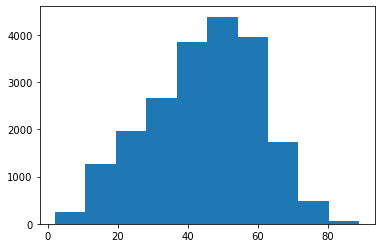

In [54]:
plt.hist(CUST_NY['AGE'])
plt.show()

In [55]:
CUST_AGE = CUST_NY[['CUST_ID','AGE']]

In [56]:
print(len( CUST_AGE.loc[CUST_AGE['AGE'] < 32,'AGE'] ))
print(len( CUST_AGE.loc[ (CUST_AGE['AGE'] >= 32) & (CUST_AGE['AGE'] < 40),'AGE'] ))
print(len( CUST_AGE.loc[ (CUST_AGE['AGE'] >= 40) & (CUST_AGE['AGE'] < 48),'AGE'] ))
print(len( CUST_AGE.loc[ (CUST_AGE['AGE'] >= 48) & (CUST_AGE['AGE'] < 53),'AGE'] ))
print(len( CUST_AGE.loc[ (CUST_AGE['AGE'] >= 53) & (CUST_AGE['AGE'] < 58),'AGE'] ))
print(len( CUST_AGE.loc[ (CUST_AGE['AGE'] >= 58) & (CUST_AGE['AGE'] < 63),'AGE'] ))
print(len( CUST_AGE.loc[CUST_AGE['AGE'] >= 63,'AGE'] ))

4250
3179
3502
2456
2687
2243
2289


In [57]:
CUST_AGE.loc[CUST_AGE['AGE'] < 32,'AGE'] = 20
CUST_AGE.loc[ (CUST_AGE['AGE'] >= 32) & (CUST_AGE['AGE'] < 40),'AGE'] = 21
CUST_AGE.loc[ (CUST_AGE['AGE'] >= 40) & (CUST_AGE['AGE'] < 48),'AGE'] = 22
CUST_AGE.loc[ (CUST_AGE['AGE'] >= 48) & (CUST_AGE['AGE'] < 53),'AGE'] = 23
CUST_AGE.loc[ (CUST_AGE['AGE'] >= 53) & (CUST_AGE['AGE'] < 58),'AGE'] = 24
CUST_AGE.loc[ (CUST_AGE['AGE'] >= 58) & (CUST_AGE['AGE'] < 63),'AGE'] = 25
CUST_AGE.loc[CUST_AGE['AGE'] >= 63,'AGE'] = 26

In [58]:
fail_student = pd.merge(left = fail_student , right = CUST_AGE, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')
fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.isnull().sum()

AGE           0
STUDENT_ID    0
dtype: int64

### 대학과 학생 거주지 거리
 - fp와의 거리를 사용

In [59]:
FP_DIST = CNTT.groupby(['CUST_ID'])['DISTANCE'].mean()

FP_DIST = FP_DIST.to_frame().reset_index()

FP_DIST.rename(columns = {'DISTANCE' : 'UNI_DIST'}, inplace = True)

In [60]:
fail_student = pd.merge(left = fail_student , right = FP_DIST, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')

fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.fillna(fail_student['UNI_DIST'].mean(), inplace = True)

fail_student.isnull().sum()

AGE           0
STUDENT_ID    0
UNI_DIST      0
dtype: int64

### 복수전공 여부
 - 결혼 여부를 사용

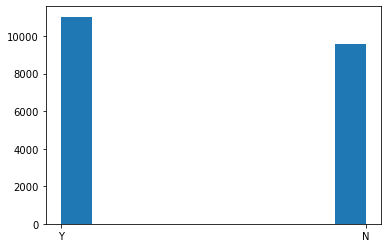

In [61]:
plt.hist(CUST_NY['WEDD_YN'])
plt.show()

In [62]:
WEDD_YN = CUST_NY[['CUST_ID','WEDD_YN']]

WEDD_YN.rename(columns = {'WEDD_YN' : 'DOUBLE_MAJOR'}, inplace = True)

fail_student = pd.merge(left = fail_student , right = WEDD_YN, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')

fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.isnull().sum()

AGE             0
DOUBLE_MAJOR    0
STUDENT_ID      0
UNI_DIST        0
dtype: int64

### 휴학
 - 현재년도 2016년을 기준으로 보험금지급 사유일자가 존재하면 휴학기록으로 맵핑
 - 알맞게 년도 범위 조정하기
 - 기간별 휴힉여부와 총 휴학 횟수

In [63]:
CLAIM['RESN_DATE_YEAR'] = CLAIM['RESN_DATE'].dt.year

df_RESN_DATE_YEAR = CLAIM.groupby(['CUST_ID','RESN_DATE_YEAR'])['RESN_DATE_YEAR'].count()

df_RESN_DATE_YEAR = df_RESN_DATE_YEAR.to_frame().rename(columns={'RESN_DATE_YEAR': 'a'}).reset_index()[['CUST_ID','RESN_DATE_YEAR']]

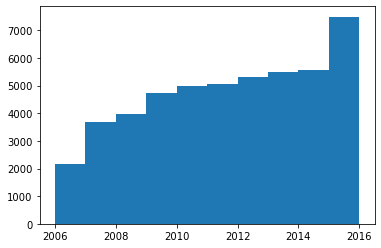

In [64]:
plt.hist(df_RESN_DATE_YEAR['RESN_DATE_YEAR'])
plt.show()

In [65]:
print(len(df_RESN_DATE_YEAR.loc[df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2009].drop_duplicates(['CUST_ID']))) # 4전년도
print(len(df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2009) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2011)].drop_duplicates(['CUST_ID']))) # 3전년도
print(len(df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2011) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2013)].drop_duplicates(['CUST_ID']))) # 2전년도
print(len(df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2013) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2015)].drop_duplicates(['CUST_ID']))) # 직전년도
print(len(df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2015) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2017)].drop_duplicates(['CUST_ID']))) # 현재학기

7507
8027
8519
9034
6455


In [66]:
# 조건을 만족하는 구간에 데이터가 몇개가 있던 존재하냐 않하냐가 중요하기 때문에 drop_duplicates를 이용함
off_4years_ago = df_RESN_DATE_YEAR.loc[df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2009].drop_duplicates(['CUST_ID']).drop('RESN_DATE_YEAR',axis=1)
off_3years_ago = df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2009) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2011)].drop_duplicates(['CUST_ID']).drop('RESN_DATE_YEAR',axis=1)
off_2years_ago = df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2011) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2013)].drop_duplicates(['CUST_ID']).drop('RESN_DATE_YEAR',axis=1)
off_1years_ago = df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2013) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2015)].drop_duplicates(['CUST_ID']).drop('RESN_DATE_YEAR',axis=1)
off_this_year = df_RESN_DATE_YEAR.loc[ (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] >= 2015) & (df_RESN_DATE_YEAR['RESN_DATE_YEAR'] < 2017)].drop_duplicates(['CUST_ID']).drop('RESN_DATE_YEAR',axis=1)

In [67]:
squares = ['Y' for x in range(len(off_4years_ago))]

off_4 = pd.concat([off_4years_ago.reset_index()[['CUST_ID']],pd.DataFrame(squares)],axis=1).rename(columns={0: 'off_4years_ago'})

squares = ['Y' for x in range(len(off_3years_ago))]

off_3 = pd.concat([off_3years_ago.reset_index()[['CUST_ID']],pd.DataFrame(squares)],axis=1).rename(columns={0: 'off_3years_ago'})

squares = ['Y' for x in range(len(off_2years_ago))]

off_2 = pd.concat([off_2years_ago.reset_index()[['CUST_ID']],pd.DataFrame(squares)],axis=1).rename(columns={0: 'off_2years_ago'})

squares = ['Y' for x in range(len(off_1years_ago))]

off_1 = pd.concat([off_1years_ago.reset_index()[['CUST_ID']],pd.DataFrame(squares)],axis=1).rename(columns={0: 'off_1years_ago'})

squares = ['Y' for x in range(len(off_this_year))]

off_0 = pd.concat([off_this_year.reset_index()[['CUST_ID']],pd.DataFrame(squares)],axis=1).rename(columns={0: 'off_this_year'})

In [68]:
fail_student = pd.merge(left = fail_student , right = off_0, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')
fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student = pd.merge(left = fail_student , right = off_1, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')
fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student = pd.merge(left = fail_student , right = off_2, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')
fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student = pd.merge(left = fail_student , right = off_3, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')
fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student = pd.merge(left = fail_student , right = off_4, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')
fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

In [69]:
fail_student.fillna('N', inplace=True)

In [70]:
fail_student.loc[fail_student['AGE'] == 20, 'off_4years_ago'] = "N"
fail_student.loc[fail_student['AGE'] == 20, 'off_3years_ago'] = "N"
fail_student.loc[fail_student['AGE'] == 20, 'off_2years_ago'] = "N"
fail_student.loc[fail_student['AGE'] == 20, 'off_1years_ago'] = "N"

fail_student.loc[fail_student['AGE'] == 21, 'off_4years_ago'] = "N"
fail_student.loc[fail_student['AGE'] == 21, 'off_3years_ago'] = "N"
fail_student.loc[fail_student['AGE'] == 21, 'off_2years_ago'] = "N"

fail_student.loc[fail_student['AGE'] == 22, 'off_4years_ago'] = "N"
fail_student.loc[fail_student['AGE'] == 22, 'off_3years_ago'] = "N"

fail_student.loc[fail_student['AGE'] == 23, 'off_4years_ago'] = "N"

##### 총 휴학 횟수

In [71]:
total_off_temp = fail_student.iloc[:,4:].sum(axis=1).to_frame()[0]

col = []
for i in range(0,len(total_off_temp)):
    col.append(total_off_temp[i].count('Y'))

TOTAL_OFF = pd.DataFrame(col).rename(columns={0: 'TOTAL_OFF'})

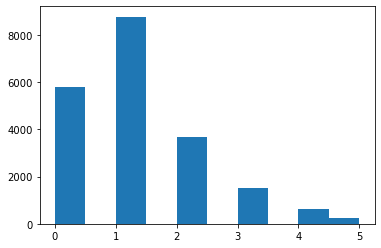

In [72]:
plt.hist(TOTAL_OFF['TOTAL_OFF'])
plt.show()

In [73]:
fail_student = pd.merge(left = fail_student , right = TOTAL_OFF, how = "left", left_index=True, right_index=True)

fail_student.isnull().sum()

AGE               0
DOUBLE_MAJOR      0
STUDENT_ID        0
UNI_DIST          0
off_1years_ago    0
off_2years_ago    0
off_3years_ago    0
off_4years_ago    0
off_this_year     0
TOTAL_OFF         0
dtype: int64

### 소득분위
 - 청약서 소득을 조정해서 맵핑
 - 대학민국 소득분위별 인구수 반영

In [74]:
pd.options.display.float_format = '{:.5f}'.format

INCM_AMT = CNTT.groupby(['CUST_ID'])['MNTH_INCM_AMT'].mean().to_frame()

In [75]:
print(len(INCM_AMT.loc[INCM_AMT['MNTH_INCM_AMT'] == 0])) # 1,2분위
print(len(INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 0) & (INCM_AMT['MNTH_INCM_AMT'] <= 1000000) ])) # 3,4분위
print(len(INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 1000000) & (INCM_AMT['MNTH_INCM_AMT'] <= 1700000) ])) # 5,6분위
print(len(INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 1700000) & (INCM_AMT['MNTH_INCM_AMT'] <= 2400000) ])) # 7,8분위
print(len(INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 2400000)])) # 9,10분위

2100
3211
3766
5539
7761


In [76]:
INCM_AMT.loc[INCM_AMT['MNTH_INCM_AMT'] == 0,'MNTH_INCM_AMT'] = 1
INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 0) & (INCM_AMT['MNTH_INCM_AMT'] <= 1000000) ,'MNTH_INCM_AMT'] = 2
INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 1000000) & (INCM_AMT['MNTH_INCM_AMT'] <= 1700000) ,'MNTH_INCM_AMT'] = 3
INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 1700000) & (INCM_AMT['MNTH_INCM_AMT'] <= 2400000) ,'MNTH_INCM_AMT'] = 4
INCM_AMT.loc[ (INCM_AMT['MNTH_INCM_AMT'] > 2400000) ,'MNTH_INCM_AMT'] = 5

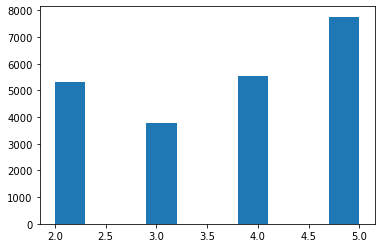

In [77]:
plt.hist(INCM_AMT['MNTH_INCM_AMT'])
plt.show()

In [78]:
fail_student = pd.merge(left = fail_student , right = INCM_AMT, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'MNTH_INCM_AMT': 'INCOME_QUINTILE'})

fail_student.loc[fail_student['INCOME_QUINTILE'].isnull(),'INCOME_QUINTILE'] = 1

fail_student.isnull().sum()

AGE                0
DOUBLE_MAJOR       0
STUDENT_ID         0
UNI_DIST           0
off_1years_ago     0
off_2years_ago     0
off_3years_ago     0
off_4years_ago     0
off_this_year      0
TOTAL_OFF          0
INCOME_QUINTILE    0
dtype: int64

### 입학전형
 - 고객역할 코드를 조정해서 맵핑
 - 현재 대입의 입학전형 비율을 참고

In [79]:
temp = CNTT[['CUST_ID','CUST_ROLE']].groupby(['CUST_ID','CUST_ROLE'])['CUST_ROLE'].count().to_frame().rename(columns={'CUST_ROLE': 'a'}).reset_index()

Admissions = temp.groupby(['CUST_ID'])['CUST_ROLE','a'].max().reset_index()[['CUST_ID','CUST_ROLE']]

In [80]:
print(len( Admissions.loc[Admissions['CUST_ROLE'] == '0'] ))
print(len( Admissions.loc[Admissions['CUST_ROLE'] == '1'] ))
print(len( Admissions.loc[Admissions['CUST_ROLE'] == '2'] ))
print(len( Admissions.loc[Admissions['CUST_ROLE'] == '21'] ))
print(len( Admissions.loc[Admissions['CUST_ROLE'] == '3'] ))
print(len( Admissions.loc[Admissions['CUST_ROLE'] == '4'] ))
print(len( Admissions.loc[Admissions['CUST_ROLE'] == '5'] ))

41
8573
7445
1582
223
153
4360


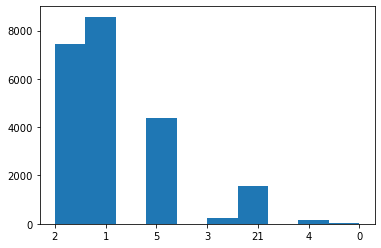

In [81]:
plt.hist(Admissions['CUST_ROLE'])
plt.show()

In [82]:
Admissions.loc[Admissions['CUST_ROLE'] == '0','CUST_ROLE'] = '정시'
Admissions.loc[Admissions['CUST_ROLE'] == '1','CUST_ROLE'] = '정시'
Admissions.loc[Admissions['CUST_ROLE'] == '2','CUST_ROLE'] = '수시'
Admissions.loc[Admissions['CUST_ROLE'] == '21','CUST_ROLE'] = '수시'
Admissions.loc[Admissions['CUST_ROLE'] == '3','CUST_ROLE'] = '수시'
Admissions.loc[Admissions['CUST_ROLE'] == '4','CUST_ROLE'] = '수시'
Admissions.loc[Admissions['CUST_ROLE'] == '5','CUST_ROLE'] = '수시'

In [83]:
Admissions = Admissions.rename(columns={'CUST_ROLE': 'ADMISSION'})

fail_student = pd.merge(left = fail_student , right = Admissions, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')

fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.loc[fail_student['ADMISSION'].isnull(),'ADMISSION'] = '정시'

fail_student.isnull().sum()

ADMISSION          0
AGE                0
DOUBLE_MAJOR       0
INCOME_QUINTILE    0
STUDENT_ID         0
TOTAL_OFF          0
UNI_DIST           0
off_1years_ago     0
off_2years_ago     0
off_3years_ago     0
off_4years_ago     0
off_this_year      0
dtype: int64

### 학과 계열
 - 1차 직업그룹코드를 이용해서 직업의 특성을 최대한 살려 계열 맵핑
 - 계열별 비율은 실제 대한민국 대학 졸업자를 기준으로 계산
 - 의학계열은 없다고 가정

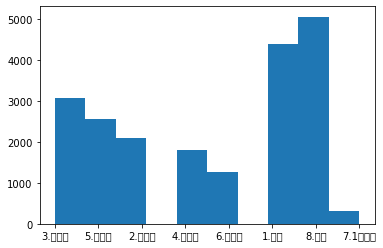

In [84]:
plt.hist(CUST_NY['OCCP_GRP_1'])
plt.show()

In [85]:
line_5 = CUST_NY[['CUST_ID','OCCP_GRP_1']]

line_5.loc[line_5['OCCP_GRP_1'] == '3.사무직','OCCP_GRP_1'] = '2.자연과학계열'
line_5.loc[line_5['OCCP_GRP_1'] == '5.서비스','OCCP_GRP_1'] = '1.인문사회계열'
line_5.loc[line_5['OCCP_GRP_1'] == '2.자영업','OCCP_GRP_1'] = '4.예체능계열'
line_5.loc[line_5['OCCP_GRP_1'] == '4.전문직','OCCP_GRP_1'] = '1.인문사회계열'
line_5.loc[line_5['OCCP_GRP_1'] == '6.제조업','OCCP_GRP_1'] = '3.공학계열'
line_5.loc[line_5['OCCP_GRP_1'] == '1.주부','OCCP_GRP_1'] = '1.인문사회계열'
line_5.loc[line_5['OCCP_GRP_1'] == '8.기타','OCCP_GRP_1'] = '4.공학계열'
line_5.loc[line_5['OCCP_GRP_1'] == '7.1차산업','OCCP_GRP_1'] = '2.자연과학계열'

In [86]:
fail_student = pd.merge(left = fail_student , right = line_5, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')

fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.isnull().sum()

ADMISSION          0
AGE                0
DOUBLE_MAJOR       0
INCOME_QUINTILE    0
OCCP_GRP_1         0
STUDENT_ID         0
TOTAL_OFF          0
UNI_DIST           0
off_1years_ago     0
off_2years_ago     0
off_3years_ago     0
off_4years_ago     0
off_this_year      0
dtype: int64

### 취득성적
 - 보험청구로 실지급받은 금액을 조정해서 맵핑
 - 총 지급액 평균을 기준으로 함

In [87]:
PAYM_AMT = CLAIM[['CUST_ID','PAYM_AMT']]

PAYM_AMT_mean = PAYM_AMT.groupby(['CUST_ID'])['PAYM_AMT'].mean().to_frame()

In [88]:
print(len( PAYM_AMT_mean.loc[PAYM_AMT_mean['PAYM_AMT'] < 80000] )) # 2.0
print(len( PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 80000) & (PAYM_AMT_mean['PAYM_AMT'] < 150000) ] )) # 2.5
print(len( PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 150000) & (PAYM_AMT_mean['PAYM_AMT'] < 270000) ] )) # 3.0
print(len( PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 270000) & (PAYM_AMT_mean['PAYM_AMT'] < 530000) ] )) # 3.5
print(len( PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 530000) & (PAYM_AMT_mean['PAYM_AMT'] < 1500000) ] )) # 4.0
print(len( PAYM_AMT_mean.loc[ PAYM_AMT_mean['PAYM_AMT'] >= 1500000 ] )) # 4.5

2167
3579
5794
5929
3239
1691


In [89]:
PAYM_AMT_mean.loc[PAYM_AMT_mean['PAYM_AMT'] < 80000,'PAYM_AMT'] = 2.0
PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 80000) & (PAYM_AMT_mean['PAYM_AMT'] < 150000) ,'PAYM_AMT'] = 2.5
PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 150000) & (PAYM_AMT_mean['PAYM_AMT'] < 270000) ,'PAYM_AMT'] = 3.0
PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 270000) & (PAYM_AMT_mean['PAYM_AMT'] < 530000) ,'PAYM_AMT'] = 3.5
PAYM_AMT_mean.loc[ (PAYM_AMT_mean['PAYM_AMT'] >= 530000) & (PAYM_AMT_mean['PAYM_AMT'] < 1500000) ,'PAYM_AMT'] = 4.0
PAYM_AMT_mean.loc[ PAYM_AMT_mean['PAYM_AMT'] >= 1500000 ,'PAYM_AMT'] = 4.5

In [90]:
fail_student = pd.merge(left = fail_student , right = PAYM_AMT_mean, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'PAYM_AMT': 'GRADE'})

fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.loc[fail_student['GRADE'].isnull(), 'GRADE'] = 3.0

fail_student.isnull().sum()

ADMISSION          0
AGE                0
DOUBLE_MAJOR       0
GRADE              0
INCOME_QUINTILE    0
OCCP_GRP_1         0
STUDENT_ID         0
TOTAL_OFF          0
UNI_DIST           0
off_1years_ago     0
off_2years_ago     0
off_3years_ago     0
off_4years_ago     0
off_this_year      0
dtype: int64

### 같은 나이 평균 성적 대비 취득 성적

In [91]:
PREPARE_GRADE = prepare_col(fail_student,'AGE','GRADE')

PREPARE_GRADE.rename(columns={'GRADE': 'PREPARE_GRADE'},inplace=True)

fail_student = pd.merge(left = fail_student , right = PREPARE_GRADE, how = "left", left_index=True, right_index=True)

fail_student.isnull().sum()

ADMISSION          0
AGE                0
DOUBLE_MAJOR       0
GRADE              0
INCOME_QUINTILE    0
OCCP_GRP_1         0
STUDENT_ID         0
TOTAL_OFF          0
UNI_DIST           0
off_1years_ago     0
off_2years_ago     0
off_3years_ago     0
off_4years_ago     0
off_this_year      0
PREPARE_GRADE      0
dtype: int64

### 출결정보
 - 보험계약 시작일부터 현재(2016)까지, 실보험료납입기간을 조정해서 출석일수로 맵핑함

In [92]:
attendance = round(CNTT.groupby(['CUST_ID'])['REAL_PAYM_TERM'].mean().to_frame()*365,0)

CUST_start = CUST_NY[['CUST_ID','CUST_RGST']]

CUST_attendance = pd.merge(left = CUST_start , right = attendance, how = "left", on = 'CUST_ID')

CUST_attendance['ATTENDANCE'] = round(CUST_attendance['REAL_PAYM_TERM'] / ( CUST_attendance['CUST_RGST'] + CUST_attendance['REAL_PAYM_TERM'] ),3)

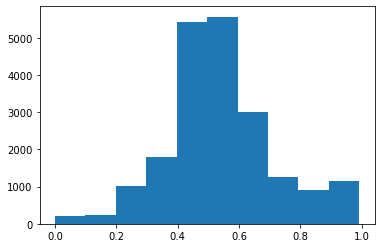

In [93]:
plt.hist(CUST_attendance['ATTENDANCE'])
plt.show()

In [94]:
print(len( CUST_attendance.loc[CUST_attendance['ATTENDANCE'] >= 0.8] )) # 100%
print(len( CUST_attendance.loc[ (CUST_attendance['ATTENDANCE'] < 0.8) & (CUST_attendance['ATTENDANCE'] >= 0.6)] )) # 90%
print(len( CUST_attendance.loc[ (CUST_attendance['ATTENDANCE'] < 0.6) & (CUST_attendance['ATTENDANCE'] >= 0.4)] )) # 80%
print(len( CUST_attendance.loc[ CUST_attendance['ATTENDANCE'] < 0.4] )) # 70%

2011
4214
10962
3399


In [95]:
CUST_attendance.loc[CUST_attendance['ATTENDANCE'] >= 0.8, 'ATTENDANCE'] = 1
CUST_attendance.loc[ (CUST_attendance['ATTENDANCE'] < 0.8) & (CUST_attendance['ATTENDANCE'] >= 0.6),'ATTENDANCE'] = 0.9
CUST_attendance.loc[ (CUST_attendance['ATTENDANCE'] < 0.6) & (CUST_attendance['ATTENDANCE'] >= 0.4),'ATTENDANCE'] = 0.8
CUST_attendance.loc[ CUST_attendance['ATTENDANCE'] < 0.4,'ATTENDANCE'] = 0.7

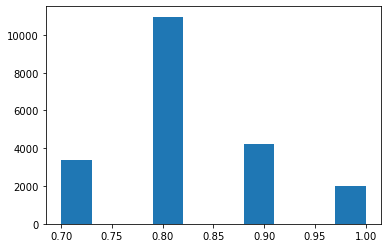

In [96]:
plt.hist(CUST_attendance['ATTENDANCE'])
plt.show()

In [97]:
fail_student = pd.merge(left = fail_student , right = CUST_attendance[['CUST_ID','ATTENDANCE']], how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID')

fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.loc[fail_student['ATTENDANCE'].isnull(),'ATTENDANCE'] = 0.9

fail_student.isnull().sum()

ADMISSION          0
AGE                0
ATTENDANCE         0
DOUBLE_MAJOR       0
GRADE              0
INCOME_QUINTILE    0
OCCP_GRP_1         0
PREPARE_GRADE      0
STUDENT_ID         0
TOTAL_OFF          0
UNI_DIST           0
off_1years_ago     0
off_2years_ago     0
off_3years_ago     0
off_4years_ago     0
off_this_year      0
dtype: int64

### 같은 나이 출석률 대비 출석률

In [98]:
PREPARE_ATTENDANCE = prepare_col(fail_student,'AGE','ATTENDANCE')

PREPARE_ATTENDANCE.rename(columns={'ATTENDANCE': 'PREPARE_ATTENDANCE'},inplace=True)

fail_student = pd.merge(left = fail_student , right = PREPARE_ATTENDANCE, how = "left", left_index=True, right_index=True)

fail_student.isnull().sum()

ADMISSION             0
AGE                   0
ATTENDANCE            0
DOUBLE_MAJOR          0
GRADE                 0
INCOME_QUINTILE       0
OCCP_GRP_1            0
PREPARE_GRADE         0
STUDENT_ID            0
TOTAL_OFF             0
UNI_DIST              0
off_1years_ago        0
off_2years_ago        0
off_3years_ago        0
off_4years_ago        0
off_this_year         0
PREPARE_ATTENDANCE    0
dtype: int64

### 교내프로그램 참여횟수
 - 계약체결년월을 조정해 맵핑
 - datetime 데이터 중 청구년월과 관계성이 가장 적은 데이터라 사용
 - 총 참여 횟수와 년도별 참여 횟수

In [99]:
temp = CNTT[['CUST_ID','CNTT_YM']]

temp['CNTT_YM_year'] = temp['CNTT_YM'].dt.year

program_num = temp.groupby(['CUST_ID','CNTT_YM_year'])['CNTT_YM_year'].count().to_frame().rename(columns={'CNTT_YM_year': 'num'}).reset_index()

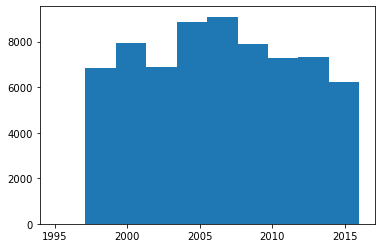

In [100]:
plt.hist(program_num['CNTT_YM_year'])
plt.show()

In [101]:
print(len(program_num.loc[program_num['CNTT_YM_year'] < 2002])) # 4전년도
print(len(program_num.loc[ (program_num['CNTT_YM_year'] >= 2002) & (program_num['CNTT_YM_year'] < 2006)])) # 3전년도
print(len(program_num.loc[ (program_num['CNTT_YM_year'] >= 2006) & (program_num['CNTT_YM_year'] < 2009)])) # 2전년도
print(len(program_num.loc[ (program_num['CNTT_YM_year'] >= 2009) & (program_num['CNTT_YM_year'] < 2012)])) # 직전년도
print(len(program_num.loc[ (program_num['CNTT_YM_year'] >= 2012) & (program_num['CNTT_YM_year'] < 2017)])) # 현재학기

14761
15742
12586
11665
13516


In [102]:
join_4years_ago = program_num.loc[program_num['CNTT_YM_year'] < 2002].groupby('CUST_ID')['num'].sum().to_frame()
join_3years_ago = program_num.loc[ (program_num['CNTT_YM_year'] >= 2002) & (program_num['CNTT_YM_year'] < 2006)].groupby('CUST_ID')['num'].sum().to_frame()
join_2years_ago = program_num.loc[ (program_num['CNTT_YM_year'] >= 2006) & (program_num['CNTT_YM_year'] < 2009)].groupby('CUST_ID')['num'].sum().to_frame()
join_1years_ago = program_num.loc[ (program_num['CNTT_YM_year'] >= 2009) & (program_num['CNTT_YM_year'] < 2012)].groupby('CUST_ID')['num'].sum().to_frame()
join_this_year = program_num.loc[ (program_num['CNTT_YM_year'] >= 2012) & (program_num['CNTT_YM_year'] < 2017)].groupby('CUST_ID')['num'].sum().to_frame()

In [103]:
fail_student = pd.merge(left = fail_student , right = join_4years_ago, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'num': 'join_4years_ago'})

fail_student = pd.merge(left = fail_student , right = join_3years_ago, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'num': 'join_3years_ago'})

fail_student = pd.merge(left = fail_student , right = join_2years_ago, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'num': 'join_2years_ago'})

fail_student = pd.merge(left = fail_student , right = join_1years_ago, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'num': 'join_1years_ago'})

fail_student = pd.merge(left = fail_student , right = join_this_year, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'num': 'join_this_year'})

fail_student.fillna(0, inplace=True)

In [104]:
fail_student.loc[fail_student['AGE'] == 20, 'join_4years_ago'] = 0
fail_student.loc[fail_student['AGE'] == 20, 'join_3years_ago'] = 0
fail_student.loc[fail_student['AGE'] == 20, 'join_2years_ago'] = 0
fail_student.loc[fail_student['AGE'] == 20, 'join_1years_ago'] = 0

fail_student.loc[fail_student['AGE'] == 21, 'join_4years_ago'] = 0
fail_student.loc[fail_student['AGE'] == 21, 'join_3years_ago'] = 0
fail_student.loc[fail_student['AGE'] == 21, 'join_2years_ago'] = 0

fail_student.loc[fail_student['AGE'] == 22, 'join_4years_ago'] = 0
fail_student.loc[fail_student['AGE'] == 22, 'join_3years_ago'] = 0

fail_student.loc[fail_student['AGE'] == 23, 'join_4years_ago'] = 0

fail_student.isnull().sum()

ADMISSION             0
AGE                   0
ATTENDANCE            0
DOUBLE_MAJOR          0
GRADE                 0
INCOME_QUINTILE       0
OCCP_GRP_1            0
PREPARE_GRADE         0
STUDENT_ID            0
TOTAL_OFF             0
UNI_DIST              0
off_1years_ago        0
off_2years_ago        0
off_3years_ago        0
off_4years_ago        0
off_this_year         0
PREPARE_ATTENDANCE    0
join_4years_ago       0
join_3years_ago       0
join_2years_ago       0
join_1years_ago       0
join_this_year        0
dtype: int64

##### 교내프로그램 총 참여 횟수

In [105]:
TOTAL_JOIN = fail_student.iloc[:,17:].sum(axis=1).to_frame().rename(columns={0: 'TOTAL_JOIN'})

fail_student = pd.merge(left = fail_student , right = TOTAL_JOIN, how = "left", left_index=True, right_index=True)

### 같은 나이 대비 교내프로그램 참여 횟수

In [106]:
PREPARE_JOIN_4 = prepare_col(fail_student,'AGE','join_4years_ago')

PREPARE_JOIN_4.rename(columns={'join_4years_ago': 'PREPARE_join_4years_ago'},inplace=True)

fail_student = pd.merge(left = fail_student , right = PREPARE_JOIN_4, how = "left", left_index=True, right_index=True)

In [107]:
PREPARE_JOIN_3 = prepare_col(fail_student,'AGE','join_3years_ago')

PREPARE_JOIN_3.rename(columns={'join_3years_ago': 'PREPARE_join_3years_ago'},inplace=True)

fail_student = pd.merge(left = fail_student , right = PREPARE_JOIN_3, how = "left", left_index=True, right_index=True)

In [108]:
PREPARE_JOIN_2 = prepare_col(fail_student,'AGE','join_2years_ago')

PREPARE_JOIN_2.rename(columns={'join_2years_ago': 'PREPARE_join_2years_ago'},inplace=True)

fail_student = pd.merge(left = fail_student , right = PREPARE_JOIN_2, how = "left", left_index=True, right_index=True)

In [109]:
PREPARE_JOIN_1 = prepare_col(fail_student,'AGE','join_1years_ago')

PREPARE_JOIN_1.rename(columns={'join_1years_ago': 'PREPARE_join_1years_ago'},inplace=True)

fail_student = pd.merge(left = fail_student , right = PREPARE_JOIN_1, how = "left", left_index=True, right_index=True)

In [110]:
PREPARE_JOIN_0 = prepare_col(fail_student,'AGE','join_this_year')

PREPARE_JOIN_0.rename(columns={'join_this_year': 'PREPARE_join_this_year'},inplace=True)

fail_student = pd.merge(left = fail_student , right = PREPARE_JOIN_0, how = "left", left_index=True, right_index=True)

In [111]:
fail_student.isnull().sum()

ADMISSION                  0
AGE                        0
ATTENDANCE                 0
DOUBLE_MAJOR               0
GRADE                      0
INCOME_QUINTILE            0
OCCP_GRP_1                 0
PREPARE_GRADE              0
STUDENT_ID                 0
TOTAL_OFF                  0
UNI_DIST                   0
off_1years_ago             0
off_2years_ago             0
off_3years_ago             0
off_4years_ago             0
off_this_year              0
PREPARE_ATTENDANCE         0
join_4years_ago            0
join_3years_ago            0
join_2years_ago            0
join_1years_ago            0
join_this_year             0
TOTAL_JOIN                 0
PREPARE_join_4years_ago    0
PREPARE_join_3years_ago    0
PREPARE_join_2years_ago    0
PREPARE_join_1years_ago    0
PREPARE_join_this_year     0
dtype: int64

### 학적 정보
 - 계약상태코드를 이용해서 label을 새롭게 맵핑함
 - 유지 : 유지,완납,납입면제,만기경과,만기지급,사망감소,장해감소,정산,반송,해약
 - 탈락 : 효력상실,해지,무효,부활취소,청약철회

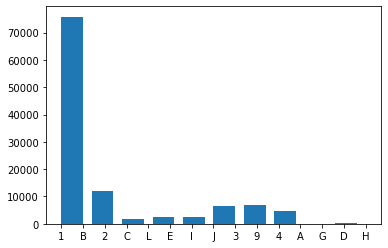

In [112]:
plt.hist(CNTT['CNTT_STAT_CODE'],width=1.0)
plt.show()

In [113]:
academic = CNTT[['CUST_ID','CNTT_STAT_CODE']]

In [114]:
academic.loc[academic['CNTT_STAT_CODE'] == '1','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == '2','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == '3','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == '4','CNTT_STAT_CODE'] = '탈락'
academic.loc[academic['CNTT_STAT_CODE'] == '9','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == 'A','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == 'B','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == 'C','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == 'D','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == 'E','CNTT_STAT_CODE'] = '탈락'
academic.loc[academic['CNTT_STAT_CODE'] == 'G','CNTT_STAT_CODE'] = '탈락'
academic.loc[academic['CNTT_STAT_CODE'] == 'H','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == 'I','CNTT_STAT_CODE'] = '탈락'
academic.loc[academic['CNTT_STAT_CODE'] == 'J','CNTT_STAT_CODE'] = '유지'
academic.loc[academic['CNTT_STAT_CODE'] == 'L','CNTT_STAT_CODE'] = '탈락'

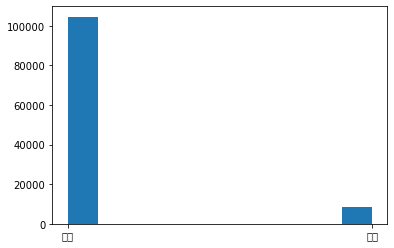

In [115]:
plt.hist(academic['CNTT_STAT_CODE'])
plt.show()

In [116]:
academic_num = academic.groupby(['CUST_ID','CNTT_STAT_CODE'])['CNTT_STAT_CODE'].count().to_frame().rename(columns={'CNTT_STAT_CODE': 'num'}).reset_index()

academic_info_temp = academic_num[academic_num['num'] == academic_num.groupby(['CUST_ID'])['num'].transform(max)][['CUST_ID','CNTT_STAT_CODE']]

academic_info = academic_info_temp.drop_duplicates(['CUST_ID'],keep='last')

fail_student = pd.merge(left = fail_student , right = academic_info, how = "left", left_on = 'STUDENT_ID', right_on = 'CUST_ID').rename(columns={'CNTT_STAT_CODE': 'ACADEMIC_STAT_CODE'})

fail_student = fail_student[fail_student.columns.difference(['CUST_ID'])]

fail_student.loc[fail_student['ACADEMIC_STAT_CODE'].isnull(),'ACADEMIC_STAT_CODE'] = '탈락'

In [117]:
len_fail=len(fail_student.loc[fail_student['ACADEMIC_STAT_CODE'] == '탈락'])
len_maintain=len(fail_student.loc[fail_student['ACADEMIC_STAT_CODE'] == '유지'])

print(len(fail_student.loc[fail_student['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(fail_student.loc[fail_student['ACADEMIC_STAT_CODE'] == '유지']))
print("중도탈락자", round( len_fail/(len_fail+len_maintain)*100 ,2),"%")

920
19686
중도탈락자 4.46 %


In [118]:
fail_student.isnull().sum()

ACADEMIC_STAT_CODE         0
ADMISSION                  0
AGE                        0
ATTENDANCE                 0
DOUBLE_MAJOR               0
GRADE                      0
INCOME_QUINTILE            0
OCCP_GRP_1                 0
PREPARE_ATTENDANCE         0
PREPARE_GRADE              0
PREPARE_join_1years_ago    0
PREPARE_join_2years_ago    0
PREPARE_join_3years_ago    0
PREPARE_join_4years_ago    0
PREPARE_join_this_year     0
STUDENT_ID                 0
TOTAL_JOIN                 0
TOTAL_OFF                  0
UNI_DIST                   0
join_1years_ago            0
join_2years_ago            0
join_3years_ago            0
join_4years_ago            0
join_this_year             0
off_1years_ago             0
off_2years_ago             0
off_3years_ago             0
off_4years_ago             0
off_this_year              0
dtype: int64

In [119]:
fail_student.to_csv('./drop_out/student_drop_out.csv',index = False)

### columns info
 - ACADEMIC_STAT_CODE : 중도탈락 여부
 - ADMISSION : 입학 전형
 - AGE : 나이
 - ATTENDANCE : 출석률
 - DOUBLE_MAJOR : 복수전공 여부
 - GRADE : 평균학점
 - INCOME_QUINTILE: 소득분위(5분위)
 - OCCP_GRP_1 : 학과 계열
 - PREPARE_ATTENDANCE : 동일 나이 대비 출석률
 - PREPARE_GRADE : 동일 나이 대비 평균학점
 - PREPARE_join_1years_ago	PREPARE_join_2years_ago	PREPARE_join_3years_ago	PREPARE_join_4years_ago	PREPARE_join_this_year 
   : 동일나이 대비 년도별 교내 프로그램 참가 횟수
 - STUDENT_ID : 학생 고유 번호
 - TOTAL_JOIN : 교내프로그램 총 참가 횟수
 - TOTAL_OFF : 총 휴학 횟수
 - UNI_DIST : 거주지와 대학간의 거리
 - join_1years_ago join_2years_ago join_3years_ago join_4years_ago join_this_year
   : 년도별 교내프로그램 참가 횟수
 - off_1years_ago	off_2years_ago	off_3years_ago	off_4years_ago	off_this_year
   : 년도별 휴학 여부